In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df = pd.read_csv('diamonds_hw.csv')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df_update = df.copy()

In [6]:
df_update

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df_update[df_update['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [8]:
df_update['carat'].fillna(df_update['carat'].mean(), inplace = True)

In [25]:
df_update.iloc[194] #mengecek ke baris atau index ke 194 yang sebelumnya carat NaN sekarang sudah terisi oleh mean untuk nilai di kolom carat.

carat           0.797891
cut              Premium
color                  E
clarity              SI1
depth               61.2
table               57.0
price               2777
x                   5.73
y                   5.68
z                   3.49
clarity_I1             0
clarity_IF             0
clarity_SI1            1
clarity_SI2            0
clarity_VS1            0
clarity_VS2            0
clarity_VVS1           0
clarity_VVS2           0
Name: 194, dtype: object

In [9]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Saya memilih metode mean untuk mengisi missing value pada kolom "carat" karena mengganti nilai yang hilang atau outlier dengan rata-rata bersih data atau rata-rata pergerakan sel n-data sebelumnya juga merupakan metode yang diikuti secara luas dan sangat membantu dalam data deret waktu.

#### Nomor 2:

In [10]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
df_update['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [12]:
pd.get_dummies(df_update['clarity'])

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,0,0,0
53936,0,0,1,0,0,0,0,0
53937,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0


In [13]:
df_update = df_update.join(pd.get_dummies(df_update['clarity'], prefix='clarity'))

In [14]:
df_update

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0


#### Nomor 3:

In [44]:
df_nomer3 = df.copy()

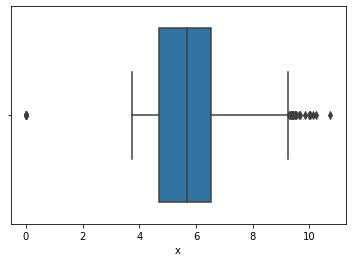

In [45]:
import seaborn as sns
sns.boxplot(x=df_nomer3['x'])
plt.show()

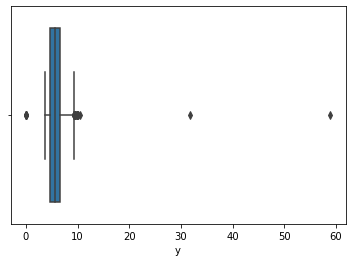

In [46]:
import seaborn as sns
sns.boxplot(x=df_nomer3['y'])
plt.show()

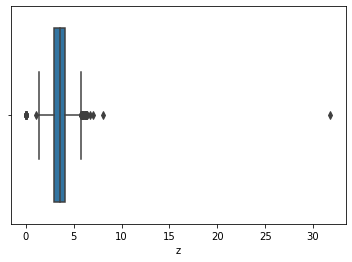

In [47]:
import seaborn as sns
sns.boxplot(x=df_nomer3['z'])
plt.show()

Untuk menjawab pertanyaan apakah x, y, dan z ada outlier ada atau tidak bisa kita simpulkan melalui boxplot tersebut bahwa terdapat outlier untuk kolom x, y dan z karena terdapat data di luar boxplot tersebut

In [48]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [56]:
df_nomer3['outlier_x'] = check_outlier(data=df_nomer3, column='x')
df_nomer3['outlier_y'] = check_outlier(data=df_nomer3, column='y')
df_nomer3['outlier_z'] = check_outlier(data=df_nomer3, column='z')

In [60]:
df_nomer3

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,not-outlier,not-outlier,not-outlier
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,not-outlier,not-outlier,not-outlier
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,not-outlier,not-outlier,not-outlier
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,not-outlier,not-outlier,not-outlier
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,not-outlier,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,not-outlier,not-outlier,not-outlier
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,not-outlier,not-outlier,not-outlier
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,not-outlier,not-outlier,not-outlier
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,not-outlier,not-outlier,not-outlier


In [65]:
df_nomer3['outlier_x'].value_counts()['outlier'] #menghitung jumlah outlier yang ada di kolom x

32

In [66]:
df_nomer3['outlier_y'].value_counts()['outlier'] #menghitung jumlah outlier yang ada di kolom y

29

In [67]:
df_nomer3['outlier_z'].value_counts()['outlier'] #menghitung jumlah outlier yang ada di kolom z

49